## Project: Investigate TMDB and OMDB movie data

### Introduction

##### For this project, our team select recent 10 years of 10000 movies dataset from TMDB API and OMDB API. These data includes movie names, rating, Rate, popularity, actor, directors, revenue, budget

### Project Background
##### Accroding to the data, our team try to research ideal movie to invest in for successful prouction based on collected data
* Analysis Notion: Decades worth data will guide us to visualize most popular and possibly successful trends as of today as market always tend to shift by the idea:survival of the fit.

### Metrics for Evaluating the Success Movie
* Popularity
* Revenue, Budget & Profit
* IMDB Rating
* Rated

### Research Part 1: General Explore 
* Release Date vs Movie Genre
* Release Date vs Movie Runtime

### Research Part 2: Find the relationship popularity/IMDB Rating 
* Q1: What is the best movie length for high popularity
* Q2: What is the best movie length for high IMDB Rating
* Q3: Which genre of movie has higher popularity&IMDB Rating
* Q4: What kind of rated movie has higher IMDB Rating

### Research Part 3: Find the key factor effect budget, revenue and profit
* Q1: Which genre of movies have the higher budget and Revenue
* Q2: Which genre of movie bring the highest Profit
* Q3: What is the relationship between movie budget, revenue and rated




##### Initial Dependencies

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
import seaborn as sns
from random import randint
# ignore some warnings if dataframe is changing
import warnings
warnings.filterwarnings('ignore')

##### Preview DataFrame

In [2]:
df = pd.read_csv("output_data/cleanup_movie_2019.csv")
df.columns

Index(['Title', 'Adult', 'Budget', 'Genres', 'Production Company',
       'Popularity', 'Revenue', 'Production Country', 'Run Time',
       'Vote Average', 'Vote Count', 'Genre1', 'Genre2', 'Genre3', 'Genre4',
       'Genre5', 'Genre6', 'Genre7', 'Rated', 'omdb_released', 'omdb_runtime',
       'Director', 'Actors', 'Language', 'omdb_country', 'Metascore',
       'IMDB Rating', 'IMDB Votes'],
      dtype='object')

In [3]:
df.head()

,Title,Adult,Budget,Genres,Production Company,Popularity,Revenue,Production Country,Run Time,Vote Average,...,Rated,omdb_released,omdb_runtime,Director,Actors,Language,omdb_country,Metascore,IMDB Rating,IMDB Votes
0,Joker,False,55000000.0,"['Crime', 'Thriller', 'Drama']","['DC Entertainment', 'Warner Bros. Pictures', ...",601.364,7.883000e+08,['United States of America'],122.0,8.6,...,R,04 Oct 2019,122 min,Todd Phillips,"Joaquin Phoenix, Robert De Niro, Zazie Beetz, ...",English,"USA, Canada",59.0,8.9,"360,218"
1,Maleficent: Mistress of Evil,False,NaN,"['Fantasy', 'Adventure', 'Family']",['Walt Disney Pictures'],257.685,NaN,['United States of America'],118.0,7.2,...,PG,18 Oct 2019,118 min,Joachim Rønning,"Angelina Jolie, Elle Fanning, Imelda Staunton,...",English,USA,NaN,NaN,NaN
2,Terminator: Dark Fate,False,160000000.0,"['Action', 'Science Fiction']","['Lightstorm Entertainment', 'Skydance Media',...",223.592,NaN,"['China', 'United States of America']",128.0,6.8,...,NaN,01 Nov 2019,NaN,Tim Miller,"Linda Hamilton, Arnold Schwarzenegger, Mackenz...",English,"China, USA",NaN,NaN,NaN
3,The Lion King,False,260000000.0,"['Adventure', 'Animation', 'Drama']","['Walt Disney Pictures', 'Fairview Entertainme...",180.573,1.649677e+09,['United States of America'],118.0,7.1,...,PG,19 Jul 2019,118 min,Jon Favreau,"Chiwetel Ejiofor, John Oliver, James Earl Jone...",English,USA,55.0,7.1,"102,621"
4,Spider-Man: Far from Home,False,160000000.0,"['Action', 'Adventure', 'Science Fiction']","['Marvel Studios', 'Sony Pictures', 'Columbia ...",149.478,1.131450e+09,['United States of America'],129.0,7.6,...,PG-13,02 Jul 2019,129 min,Jon Watts,"Tom Holland, Samuel L. Jackson, Jake Gyllenhaa...","Italian, Czech, English",USA,69.0,7.7,"187,214"


### Research Part 1: General Explore 

#### Question 1: Release Date vs Movie Runtime

In [4]:
clean_df = df[['Title','Genres','omdb_released','omdb_runtime','omdb_country',
               'IMDB Rating','IMDB Votes','Revenue']]
clean_df.head(1)

,Title,Genres,omdb_released,omdb_runtime,omdb_country,IMDB Rating,IMDB Votes,Revenue
0,Joker,"['Crime', 'Thriller', 'Drama']",04 Oct 2019,122 min,"USA, Canada",8.9,"360,218",788300000.0


In [5]:
clean_df['omdb_released'] =  pd.to_datetime(clean_df['omdb_released'])
print(clean_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9997 entries, 0 to 9996
Data columns (total 8 columns):
Title            9997 non-null object
Genres           9997 non-null object
omdb_released    9617 non-null datetime64[ns]
omdb_runtime     9531 non-null object
omdb_country     9665 non-null object
IMDB Rating      9557 non-null float64
IMDB Votes       9557 non-null object
Revenue          2943 non-null float64
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 624.9+ KB
None


In [6]:
clean_df = clean_df.dropna(how='any').sort_values('omdb_released',ascending=True)
clean_df = clean_df.rename(columns={'omdb_title':'Title','omdb_released':'Release Date',
                                    'omdb_runtime':'Runtime (min)','omdb_country':'Country',
                                    'omdb_imdbRating':'imdb_Rating','omdb_imdbVotes':'imdb_Votes'})

clean_df = clean_df[clean_df['Release Date'].isin(pd.date_range(start='2009', end='20191028'))]

In [7]:
clean_df['Runtime (min)'] = clean_df['Runtime (min)'].str.replace(' min','').astype(np.uint8)

In [8]:
clean_df = clean_df[clean_df.Country.str.contains("USA")]

In [9]:
group_mean_df = clean_df[['Release Date', 'Runtime (min)']]
group_mean_df['Release Date'] = group_mean_df['Release Date'].dt.strftime('%Y')
group_mean_df = group_mean_df.groupby('Release Date').mean().reset_index()

In [10]:
avg_runtime = clean_df['Runtime (min)'].mean()
print(avg_runtime)

106.31640808650681


In [11]:
group_all_df = clean_df[['Release Date', 'Runtime (min)']]

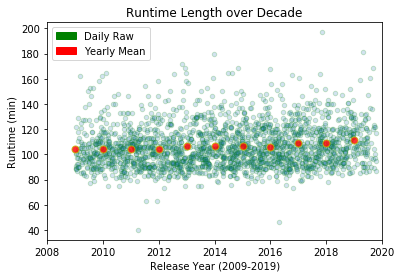

In [12]:
plt.scatter(group_all_df['Release Date'],group_all_df['Runtime (min)'], alpha=0.2,edgecolors='g',s=20 )
plt.scatter(group_mean_df['Release Date'],group_mean_df['Runtime (min)'],alpha=0.8,c='r',edgecolors='y',s=50)
plt.xlabel('Release Year (2009-2019)')
plt.xlim('2008','2020')
plt.ylabel('Runtime (min)')
plt.title('Runtime Length over Decade')
green_scatter = mpatches.Patch(color='g', label='Daily Raw')
red_scatter = mpatches.Patch(color='r', label='Yearly Mean')
plt.legend(handles=[green_scatter,red_scatter])

plt.savefig("Output_Data/Release_vs_Runtime.png")

plt.show()

#### Conclusion
* Green scatters are individual year-month-day data since 2009 to today.
* Red scatter points are mean value per year.
* Deep dark green areas coincide well with red areas showing that over the decade runtime has always been steady in its place around 100 minutes.

#### Question 2: Release Date vs Movie Genre

In [13]:
clean_df.head()

,Title,Genres,Release Date,Runtime (min),Country,IMDB Rating,IMDB Votes,Revenue
1467,Bride Wars,"['Comedy', 'Romance']",2009-01-09,89,USA,5.5,"95,747",114663461.0
1966,The Unborn,"['Horror', 'Thriller', 'Mystery']",2009-01-09,88,USA,4.8,"47,407",76514050.0
2429,Hotel for Dogs,"['Comedy', 'Family']",2009-01-16,100,"Germany, USA",5.4,"20,204",117000198.0
3920,My Bloody Valentine,"['Mystery', 'Horror']",2009-01-16,101,USA,5.4,"51,333",102836002.0
2704,Notorious,"['Drama', 'Music', 'History']",2009-01-16,122,USA,6.7,"38,659",43051547.0


In [14]:
genre_df = clean_df[['Release Date','Genres']]
new_df= pd.DataFrame(genre_df.Genres.str.split(",").tolist(), index=genre_df['Release Date']).stack()
new_df = new_df.str.replace(r'[^a-zA-Z]\s?',r'',regex=True)

In [15]:
genre_date_df = new_df.reset_index([0,'Release Date'])
genre_date_df.columns = ['Release Date','Genres']
genre_date_df['Release Date'] = genre_date_df['Release Date'].dt.strftime('%Y')

In [16]:
genre_date_df['Genres'].replace('', np.nan, inplace=True)
genre_date_df.dropna(subset=['Genres'],inplace=True,how='any')

In [17]:
group_genre_df = genre_date_df.groupby('Release Date')['Genres'].value_counts()
group_genre_df = group_genre_df.to_frame(name='Total Count').reset_index()
group_genre_df.head()

,Release Date,Genres,Total Count
0,2009,Comedy,67
1,2009,Drama,60
2,2009,Thriller,49
3,2009,Action,38
4,2009,Adventure,32


In [18]:
group_genre_pivot = group_genre_df.pivot(index='Genres',columns='Release Date',values='Total Count')
group_genre_pivot = group_genre_pivot.fillna(value=0)
group_genre_pivot['Total'] = group_genre_pivot.T.sum()
group_genre_pivot = group_genre_pivot.sort_values('Total',ascending=False)
genre_pivot_top4 = group_genre_pivot.head(4)

In [19]:
group_genre_T = group_genre_pivot.T
group_genre_T = group_genre_T[:-1]
group_genre_T.head()

Genres,Drama,Comedy,Thriller,Action,Adventure,Romance,Crime,ScienceFiction,Horror,Family,Fantasy,Mystery,Animation,History,Documentary,Music,War,Western,TVMovie
Release Date,,,,,,,,,,,,,,,,,,,
2009,60.0,67.0,49.0,38.0,32.0,32.0,25.0,29.0,23.0,24.0,16.0,26.0,12.0,4.0,4.0,7.0,4.0,0.0,0.0
2010,88.0,78.0,44.0,50.0,33.0,45.0,22.0,14.0,16.0,27.0,25.0,18.0,12.0,2.0,7.0,2.0,3.0,2.0,0.0
2011,96.0,80.0,61.0,45.0,31.0,39.0,24.0,23.0,22.0,26.0,20.0,20.0,14.0,5.0,12.0,6.0,2.0,3.0,0.0
2012,94.0,77.0,58.0,47.0,26.0,35.0,27.0,21.0,21.0,17.0,20.0,14.0,12.0,4.0,7.0,6.0,5.0,2.0,0.0
2013,100.0,61.0,65.0,55.0,29.0,25.0,38.0,20.0,25.0,15.0,16.0,7.0,14.0,7.0,7.0,6.0,1.0,2.0,0.0


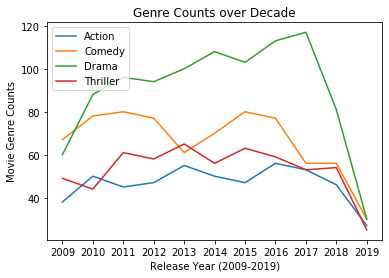

In [20]:
Action_plot, = plt.plot(group_genre_T.index, group_genre_T['Action'])
Comedy_plot, = plt.plot(group_genre_T.index, group_genre_T['Comedy'])
Drama_plot, = plt.plot(group_genre_T.index, group_genre_T['Drama'])
Thriller_plot, = plt.plot(group_genre_T.index, group_genre_T['Thriller'])

plt.xlabel('Release Year (2009-2019)')
plt.ylabel('Movie Genre Counts')
plt.title('Genre Counts over Decade')
plt.legend((Action_plot,Comedy_plot,Drama_plot,Thriller_plot),('Action','Comedy','Drama','Thriller'),loc=2)

plt.savefig("Output_Data/Release_vs_Genre.png")
plt.show()

#### Conclusion
* Filtered by top 4 of mostly produced genres that shows trends over the decade.
* As cliche as it sounds, Action movie is the way to go.
* One thing to note: 2019's data is incomplete yet and many data were dropped due to missing values, so sudden drops in 2019 isn't necessarily true.

### Research Part 2: Find the key factors effect popularity/IMDB Rating (Mohan)

#### Question 1: Popularity and Runtime
* Drop out the missing data and subset the categories need to be analysed
* Make a scatter plot to see the relationship between popularity and runtime

In [21]:
#Drop the null values in the subset
set1=["Title","Popularity","Run Time","Vote Average","IMDB Rating","Metascore"]
#Check data 
df_runtime=df[set1].dropna().reset_index(drop=True)
df_runtime.head()

,Title,Popularity,Run Time,Vote Average,IMDB Rating,Metascore
0,Joker,601.364,122.0,8.6,8.9,59.0
1,The Lion King,180.573,118.0,7.1,7.1,55.0
2,Spider-Man: Far from Home,149.478,129.0,7.6,7.7,69.0
3,Fast & Furious Presents: Hobbs & Shaw,117.194,137.0,6.5,6.7,60.0
4,Toy Story 4,105.512,100.0,7.6,8.1,84.0


In [22]:
#Remove the outlier
df_runtime=df_runtime.loc[df_runtime['Popularity']!=df_runtime['Popularity'].max()]

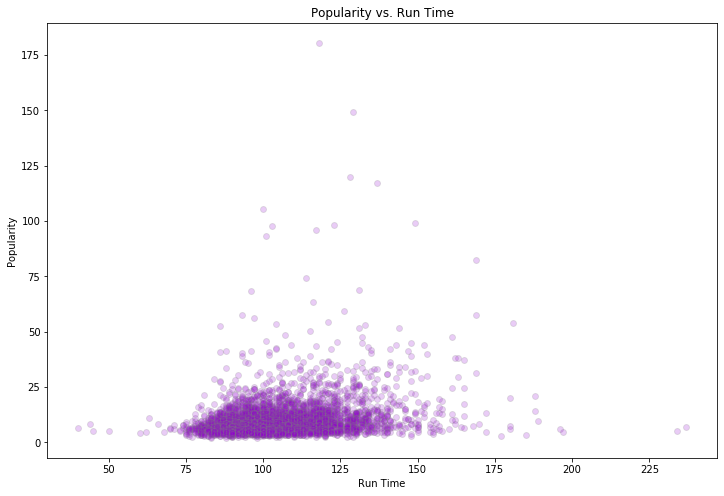

In [23]:
#set axis and tick locations
x_axis=df_runtime["Run Time"]
plt.figure(figsize=(12,8))
plt.scatter(x_axis,df_runtime["Popularity"], facecolor = "darkviolet", edgecolor = "grey", alpha = 0.2)
# Set a Title and labels
plt.title("Popularity vs. Run Time")
plt.xlabel("Run Time")
plt.ylabel("Popularity")
#plt.tight_layout()
plt.savefig("output_data/POPvsRT.png")
plt.show()

#### Conclusion
* In General, the movie length is between 1.5 hr to 2 hr. 
* The movie run time shorter than 1.5 hr and movie run time longer than 2 hr has low popularity


#### Question 2: IMDB Rating and Runtime
* Assumption  The popularity has some correlation with the IMDB Rating

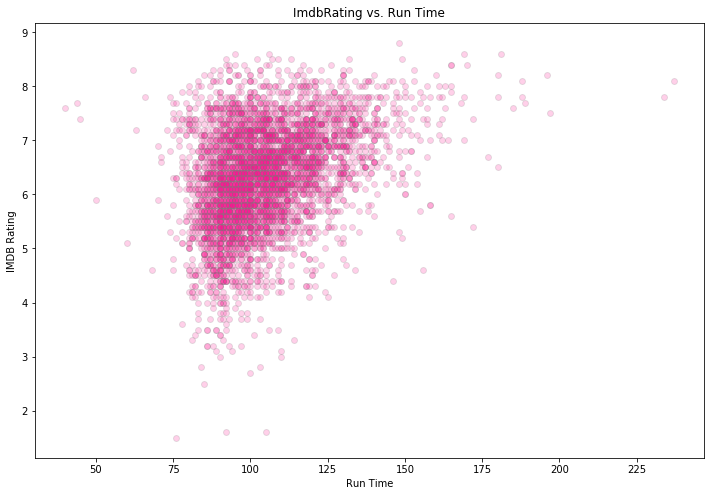

In [24]:
#set axis and tick locations
x_axis=df_runtime["Run Time"]
plt.figure(figsize=(12,8))
plt.scatter(x_axis,df_runtime["IMDB Rating"], facecolor = "deeppink", edgecolor = "grey", alpha = 0.2)
# Set a Title and labels
plt.title("ImdbRating vs. Run Time")
plt.xlabel("Run Time")
plt.ylabel("IMDB Rating")
#plt.tight_layout()
plt.savefig("output_data/RatingvsRT.png")
plt.show()

#### Conclusion
* As opppsite to popularity, the shorter movie and longer movie has higher IMDB Rating
* We can conclude that there is no relationship between IMDB rating and popularity towards movie runtime 

In [25]:
#Drop the null values in the subset
set2=["Title","Budget","Revenue","Popularity","IMDB Rating","IMDB Votes","Genre1","Genre2","Genre3","Genre4","Genre5","Genre6","Genre7"]
set3=["Title","Popularity","IMDB Rating","IMDB Votes","Budget","Revenue"]
df_set2=df[set2].dropna(subset=(set3)).set_index("Title")
df_set2.head()

,Budget,Revenue,Popularity,IMDB Rating,IMDB Votes,Genre1,Genre2,Genre3,Genre4,Genre5,Genre6,Genre7
Title,,,,,,,,,,,,
Joker,55000000.0,7.883000e+08,601.364,8.9,"360,218",Crime,Thriller,Drama,NaN,NaN,NaN,NaN
The Lion King,260000000.0,1.649677e+09,180.573,7.1,"102,621",Adventure,Animation,Drama,NaN,NaN,NaN,NaN
Spider-Man: Far from Home,160000000.0,1.131450e+09,149.478,7.7,"187,214",Action,Adventure,Science Fiction,NaN,NaN,NaN,NaN
Fast & Furious Presents: Hobbs & Shaw,200000000.0,7.600990e+08,117.194,6.7,"74,896",Action,NaN,NaN,NaN,NaN,NaN,NaN
Toy Story 4,175000000.0,5.198028e+08,105.512,8.1,"96,147",Adventure,Animation,Comedy,Family,Fantasy,NaN,NaN


#### Question 3 Which genre has highest popularity and IMDB Rating
* In order to separate the genre and then do the calculation based on IMDB Rating and Popularity. Convert Genre list into different columns
* Then since there is no repeat genres in each movie, groupby on Genre with each column 
* Set each column as a individual dataframe then combine together

In [26]:
#Collect Data Based on Genre
df_genre1_count=df_set2.groupby("Genre1")["Popularity"].count().reset_index(name="Counts1").set_index("Genre1")
df_genre1_pop=df_set2.groupby("Genre1")["Popularity"].sum().reset_index(name="Popularity Sum1").set_index('Genre1')
df_genre1_imdbr=df_set2.groupby("Genre1")["IMDB Rating"].sum().reset_index(name="IMDB Rating Sum1").set_index('Genre1')
df_genre1_budget=df_set2.groupby("Genre1")["Budget"].sum().reset_index(name="Budget Sum1").set_index('Genre1')
df_genre1_revenue=df_set2.groupby("Genre1")["Revenue"].sum().reset_index(name="Revenue Sum1").set_index('Genre1')

df_genre2_count=df_set2.groupby("Genre2")["Popularity"].count().reset_index(name="Counts2").set_index("Genre2")
df_genre2_pop=df_set2.groupby("Genre2")["Popularity"].sum().reset_index(name="Popularity Sum2").set_index('Genre2')
df_genre2_imdbr=df_set2.groupby("Genre2")["IMDB Rating"].sum().reset_index(name="IMDB Rating Sum2").set_index('Genre2')
df_genre2_budget=df_set2.groupby("Genre2")["Budget"].sum().reset_index(name="Budget Sum2").set_index('Genre2')
df_genre2_revenue=df_set2.groupby("Genre2")["Revenue"].sum().reset_index(name="Revenue Sum2").set_index('Genre2')

df_genre3_count=df_set2.groupby("Genre3")["Popularity"].count().reset_index(name="Counts3").set_index("Genre3")
df_genre3_pop=df_set2.groupby("Genre3")["Popularity"].sum().reset_index(name="Popularity Sum3").set_index('Genre3')
df_genre3_imdbr=df_set2.groupby("Genre3")["IMDB Rating"].sum().reset_index(name="IMDB Rating Sum3").set_index('Genre3')
df_genre3_budget=df_set2.groupby("Genre3")["Budget"].sum().reset_index(name="Budget Sum3").set_index('Genre3')
df_genre3_revenue=df_set2.groupby("Genre3")["Revenue"].sum().reset_index(name="Revenue Sum3").set_index('Genre3')

df_genre4_count=df_set2.groupby("Genre4")["Popularity"].count().reset_index(name="Counts4").set_index("Genre4")
df_genre4_pop=df_set2.groupby("Genre4")["Popularity"].sum().reset_index(name="Popularity Sum4").set_index('Genre4')
df_genre4_imdbr=df_set2.groupby("Genre4")["IMDB Rating"].sum().reset_index(name="IMDB Rating Sum4").set_index('Genre4')
df_genre4_budget=df_set2.groupby("Genre4")["Budget"].sum().reset_index(name="Budget Sum4").set_index('Genre4')
df_genre4_revenue=df_set2.groupby("Genre4")["Revenue"].sum().reset_index(name="Revenue Sum4").set_index('Genre4')

df_genre5_count=df_set2.groupby("Genre5")["Popularity"].count().reset_index(name="Counts5").set_index("Genre5")
df_genre5_pop=df_set2.groupby("Genre5")["Popularity"].sum().reset_index(name="Popularity Sum5").set_index('Genre5')
df_genre5_imdbr=df_set2.groupby("Genre5")["IMDB Rating"].sum().reset_index(name="IMDB Rating Sum5").set_index('Genre5')
df_genre5_budget=df_set2.groupby("Genre5")["Budget"].sum().reset_index(name="Budget Sum5").set_index('Genre5')
df_genre5_revenue=df_set2.groupby("Genre5")["Revenue"].sum().reset_index(name="Revenue Sum5").set_index('Genre5')

df_genre6_count=df_set2.groupby("Genre6")["Popularity"].count().reset_index(name="Counts6").set_index("Genre6")
df_genre6_pop=df_set2.groupby("Genre6")["Popularity"].sum().reset_index(name="Popularity Sum6").set_index('Genre6')
df_genre6_imdbr=df_set2.groupby("Genre6")["IMDB Rating"].sum().reset_index(name="IMDB Rating Sum6").set_index('Genre6')
df_genre6_budget=df_set2.groupby("Genre6")["Budget"].sum().reset_index(name="Budget Sum6").set_index('Genre6')
df_genre6_revenue=df_set2.groupby("Genre6")["Revenue"].sum().reset_index(name="Revenue Sum6").set_index('Genre6')

df_genre7_count=df_set2.groupby("Genre7")["Popularity"].count().reset_index(name="Counts7").set_index("Genre7")
df_genre7_pop=df_set2.groupby("Genre7")["Popularity"].sum().reset_index(name="Popularity Sum7").set_index('Genre7')
df_genre7_imdbr=df_set2.groupby("Genre7")["IMDB Rating"].sum().reset_index(name="IMDB Rating Sum7").set_index('Genre7')
df_genre7_budget=df_set2.groupby("Genre7")["Budget"].sum().reset_index(name="Budget Sum7").set_index('Genre7')
df_genre7_revenue=df_set2.groupby("Genre7")["Revenue"].sum().reset_index(name="Revenue Sum7").set_index('Genre7')

df_genre=pd.concat([df_genre1_count,df_genre1_pop,df_genre1_imdbr,df_genre1_budget,df_genre1_revenue,
                    df_genre2_count,df_genre2_pop,df_genre2_imdbr,df_genre2_budget,df_genre2_revenue,
                    df_genre3_count,df_genre3_pop,df_genre3_imdbr,df_genre3_budget,df_genre3_revenue,
                    df_genre4_count,df_genre4_pop,df_genre4_imdbr,df_genre4_budget,df_genre4_revenue,
                    df_genre5_count,df_genre5_pop,df_genre5_imdbr,df_genre5_budget,df_genre5_revenue,
                    df_genre6_count,df_genre6_pop,df_genre6_imdbr,df_genre6_budget,df_genre6_revenue,
                    df_genre7_count,df_genre7_pop,df_genre7_imdbr,df_genre7_budget,df_genre7_revenue],axis=1)

In [27]:
df_genre_count=df_genre[["Counts1","Counts2","Counts3","Counts4","Counts5","Counts6","Counts7"]].sum(axis=1)
df_genre_count=df_genre_count.reset_index(name="Counts").set_index('index')

df_genre_Popularity=df_genre[["Popularity Sum1","Popularity Sum2","Popularity Sum3","Popularity Sum4",
                              "Popularity Sum5","Popularity Sum6","Popularity Sum7"]].sum(axis=1)/df_genre_count["Counts"]
df_genre_Popularity=df_genre_Popularity.reset_index(name="Average Popularity").set_index('index')

df_genre_imdbr=df_genre[["IMDB Rating Sum1","IMDB Rating Sum2","IMDB Rating Sum3","IMDB Rating Sum4",
                         "IMDB Rating Sum5","IMDB Rating Sum6","IMDB Rating Sum7"]].sum(axis=1)/df_genre_count["Counts"]
df_genre_imdbr=df_genre_imdbr.reset_index(name="Average IMDB Rating").set_index('index')

df_genre_budget=df_genre[["Budget Sum1","Budget Sum2","Budget Sum3","Budget Sum4",
                         "Budget Sum5","Budget Sum6","Budget Sum7"]].sum(axis=1)/df_genre_count["Counts"]
df_genre_budget=df_genre_budget.reset_index(name="Average Budget").set_index('index')

df_genre_revenue=df_genre[["Revenue Sum1","Revenue Sum2","Revenue Sum3","Revenue Sum4",
                         "Revenue Sum5","Revenue Sum6","Revenue Sum7"]].sum(axis=1)/df_genre_count["Counts"]
df_genre_revenue=df_genre_revenue.reset_index(name="Average Revenue").set_index('index')

df_genre_profit=df_genre_revenue["Average Revenue"]-df_genre_budget["Average Budget"]
df_genre_profit=df_genre_profit.reset_index(name="Average Profit").set_index('index')

df_genre_return=df_genre_profit["Average Profit"]/df_genre_budget["Average Budget"]*100
df_genre_return=df_genre_return.reset_index(name="Return %").set_index('index')
genre_table=pd.concat([df_genre_count,df_genre_Popularity,df_genre_imdbr,df_genre_budget,df_genre_revenue,df_genre_profit,df_genre_return],axis=1).reset_index()
genre_table=genre_table.rename(columns={"index":"Genre"})
genre_table.head()

,Genre,Counts,Average Popularity,Average IMDB Rating,Average Budget,Average Revenue,Average Profit,Return %
0,Action,615.0,16.565759,6.372846,6.899545e+07,2.172599e+08,1.482645e+08,214.890241
1,Adventure,405.0,19.334923,6.489877,9.973407e+07,3.443762e+08,2.446422e+08,245.294479
2,Animation,159.0,17.625818,6.611321,8.078355e+07,2.946372e+08,2.138536e+08,264.724178
3,Comedy,721.0,12.466454,6.297365,3.715512e+07,1.202955e+08,8.314043e+07,223.765724
4,Crime,295.0,14.692746,6.494576,3.171492e+07,8.068533e+07,4.897040e+07,154.408081


In [28]:
# #set axis and tick locations
# x_axis=genre_table["Genre"]
# plt.figure(figsize=(12,8))
# plt.bar(x_axis,genre_table["Counts"],color="orangered")
# # Set a Title and labels
# plt.title("Movie Numbers vs. Genre")
# plt.xlabel("Genres")
# plt.ylabel("Total Movies")
# plt.xticks(rotation=90)
# #plt.tight_layout()
# plt.savefig("output_data/num_movie vs Genre.png")
# plt.show()

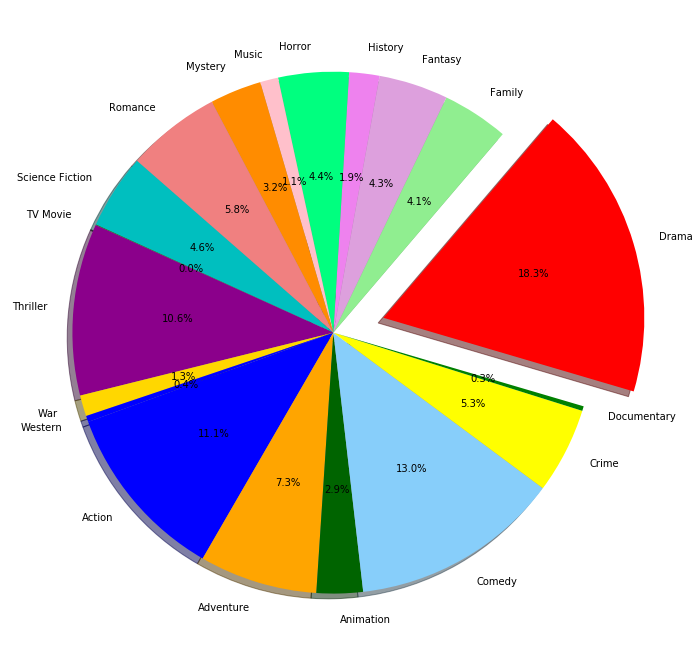

In [29]:
labels=genre_table["Genre"]
sizes=genre_table["Counts"]
genre_table_2 = genre_table.set_index("Genre")
colors=["blue", "orange", "darkgreen", "lightskyblue","yellow",
        "green","red","lightgreen","plum","violet",
        "springgreen","pink","darkorange","lightcoral",
        "c","g","darkmagenta","gold"]
        
explode = (0, 0, 0, 0, 0, 0, 0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.figure(figsize = (12,12))
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=200)
plt.savefig("output_data/num_movie vs Genre.png")
plt.show()

#### Conclusion
* Drama type of the movie has the highest production rate
* It also bring us a question, does it mean it has a high popularity or IMDB rating

In [30]:
genre_table_production=genre_table_2.sort_values(by=["Counts"],ascending=False)
genre_table_production=genre_table_production["Counts"].map('{:,.0f}'.format)
genre_table_production.reset_index(name="count").set_index("Genre").head()

,count
Genre,
Drama,"1,015"
Comedy,721
Action,615
Thriller,590
Adventure,405


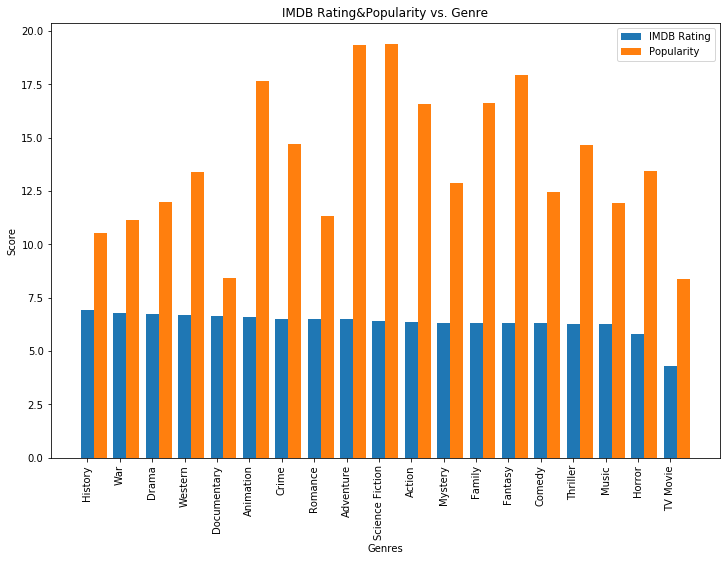

In [31]:
genre_table_rating=genre_table_2.sort_values(by=["Average IMDB Rating"],ascending=False)
x_range = np.arange(0,38,2)
plt.figure(figsize = (12,8))
plt.bar(x_range, genre_table_rating["Average IMDB Rating"],label='IMDB Rating')
plt.bar(x_range+0.8, genre_table_rating["Average Popularity"],label='Popularity')
plt.xticks(x_range, genre_table_rating.index, rotation = 90)
plt.legend( loc='upper right')
plt.title("IMDB Rating&Popularity vs. Genre")
plt.xlabel("Genres")
plt.ylabel("Score")
plt.xticks(rotation=90)
#plt.tight_layout()
plt.savefig("output_data/IMDB Rating&Popularity vs Genre.png")
plt.show()

#### Conclusion 
* There is no relationship between IMDB Rating and Popularity
* Science Fiction Movie has the highest popularity and History Movie has the highest IMDB rating

In [32]:
genre_table_2 = genre_table.set_index("Genre").sort_values(by=["Average Profit"],ascending=False)
genre_table_2.head()

,Counts,Average Popularity,Average IMDB Rating,Average Budget,Average Revenue,Average Profit,Return %
Genre,,,,,,,
Adventure,405.0,19.334923,6.489877,9.973407e+07,3.443762e+08,2.446422e+08,245.294479
Animation,159.0,17.625818,6.611321,8.078355e+07,2.946372e+08,2.138536e+08,264.724178
Science Fiction,257.0,19.404319,6.387938,8.604632e+07,2.904382e+08,2.043919e+08,237.537052
Fantasy,238.0,17.906655,6.300000,8.935070e+07,2.918539e+08,2.025032e+08,226.638574
Family,228.0,16.594754,6.308772,8.440672e+07,2.811589e+08,1.967522e+08,233.100114


#### Question 4 The correlation between IMDB Rating and Movie rated

In [33]:
# dropping the rows that have no value for Omdb-Rated and Revenue
df_1 = df.dropna(subset = ["Rated","Revenue"])
df_1.head(5)
# dropping the rows with 0 Revenue
index_1 = df_1[df_1['Revenue']==0].index
df_1.drop(index_1, inplace = True)
# dropping the rows with 0 Revenue
index_1 = df_1[df_1['Revenue']==0].index
df_1.drop(index_1, inplace = True)
df_1[['Rated','Revenue']].head()
df_2 = df.dropna(subset = ["Rated","Vote Average"])

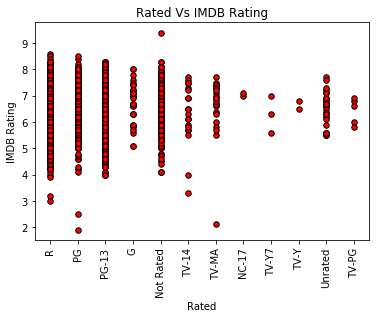

In [53]:
plt.scatter(df_1["Rated"],df_1["Vote Average"],s = 30, edgecolors="black",facecolors="red")
plt.title("Rated Vs IMDB Rating")
plt.xlabel("Rated")
plt.ylabel("IMDB Rating")
plt.xticks(rotation=90)
df_1['Rated'].value_counts()
list(df_1['Rated'].unique())
plt.savefig('output_data/Rated vs IMDB Rating.png')
plt.show()

### Research Part 3: Key factors of budget, revenue, and profit

#### Question 1: Which genre of movie bring the highest profit

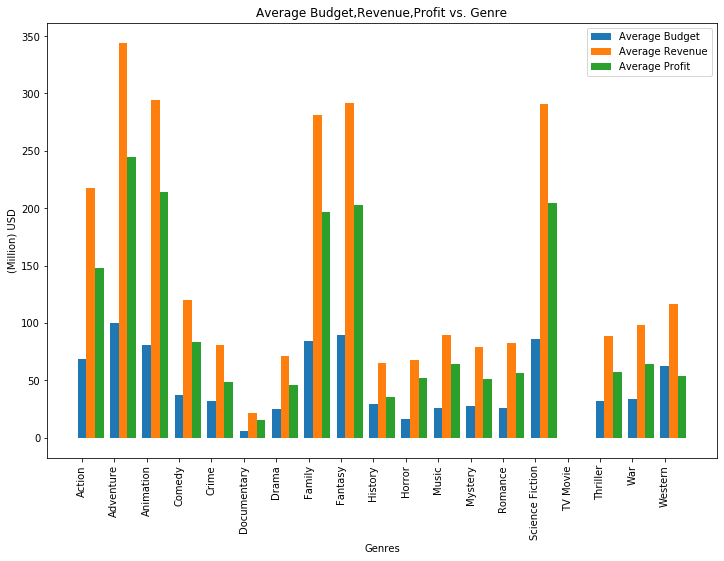

In [35]:
genre_table_2 = genre_table.set_index("Genre")
x_range = np.arange(0,57,3)
plt.figure(figsize = (12,8))
plt.bar(x_range, genre_table_2["Average Budget"]/1000000,label='Average Budget')
plt.bar(x_range+0.8, genre_table_2["Average Revenue"]/1000000,label='Average Revenue')
plt.bar(x_range+1.6, genre_table_2["Average Profit"]/1000000,label='Average Profit')

plt.xticks(x_range, genre_table_2.index, rotation = 90)
plt.legend( loc='upper right')
plt.title("Average Budget,Revenue,Profit vs. Genre")
plt.xlabel("Genres")
plt.ylabel("(Million) USD")
plt.xticks(rotation=90)
#plt.tight_layout()
plt.savefig("output_data/Average_Budget,Revenue,Profit vs Genre.png")
plt.show()

#### Conclusion
* In general higher budget always bring higher revenue and higher profit

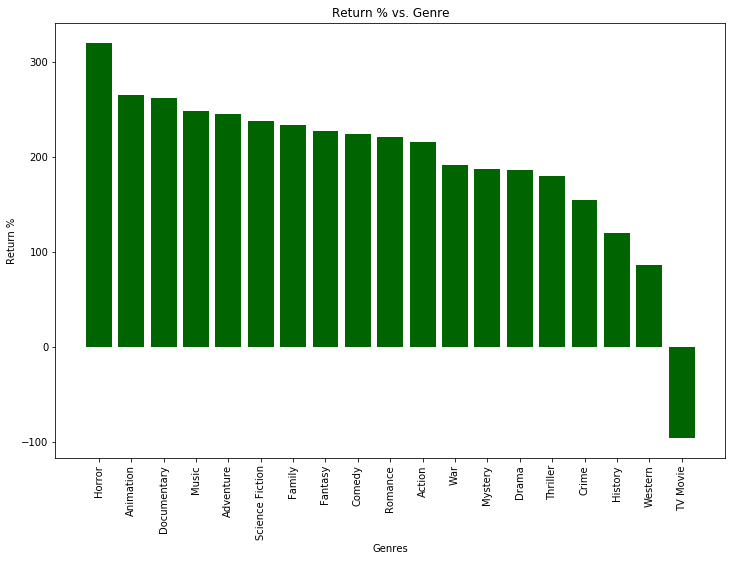

In [36]:
#set axis and tick locations
genre_table_profit=genre_table.sort_values(by=["Return %"],ascending=False)
x_axis=genre_table_profit["Genre"]
plt.figure(figsize=(12,8))
plt.bar(x_axis,genre_table_profit["Return %"],color="Darkgreen")
# Set a Title and labels
plt.title("Return % vs. Genre")
plt.xlabel("Genres")
plt.ylabel("Return %")
plt.xticks(rotation=90)
#plt.tight_layout()
plt.savefig("output_data/Return % vs Genre.png")
plt.show()

#### Conclusion
* Only Adventure type of movie has a higher return rate among all the high revenue movies
* Horror movie has the highest return rate than any other type of movie

#### Question 2 How the budget effect the IMDB rating?
* Use seaborn to generate the plot

In [37]:
df_new = pd.read_csv("output_data/cleanup_movie_2019.csv")
df_new = df_new[["Budget", "Revenue", "Vote Average"]]
df_new = df_new.replace(0,np.nan)
df_new = df_new.dropna()
df_new = df_new.reset_index(drop=True)

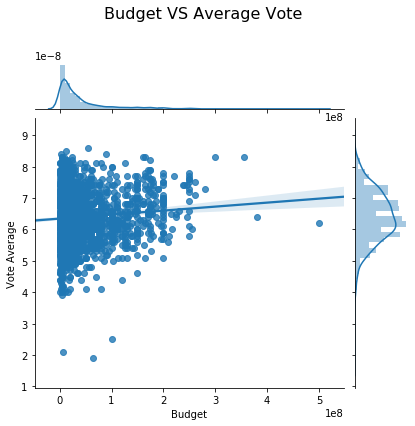

In [38]:
g = sns.jointplot("Budget", "Vote Average", data=df_new, kind="reg")
g.fig.subplots_adjust(top=.85)
g.fig.suptitle('Budget VS Average Vote', fontsize=16)
plt.savefig("output_data/Average Vote vs Budget.png",dpi=300) #added
plt.show()

#### Revenue VS Average Vote

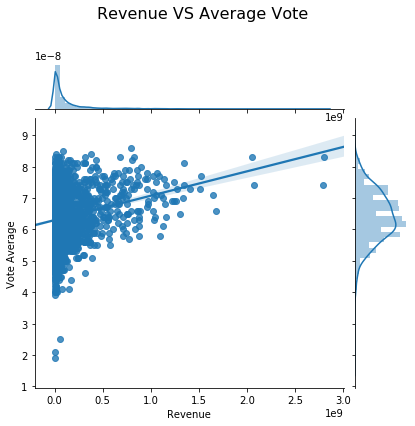

In [39]:
g = sns.jointplot("Revenue", "Vote Average", data=df_new, kind="reg")
g.fig.subplots_adjust(top=.85)
g.fig.suptitle('Revenue VS Average Vote', fontsize=16)
plt.savefig("output_data/Average Vote vs Revenue.png",dpi=300) #added
plt.show()

#### Profitable VS Average Rating

In [40]:
df_new["Profit"] = df_new["Revenue"]-df_new["Budget"]
df_new["Profitable"] = df_new["Revenue"]-df_new["Budget"]

df_new.loc[df_new.Profit <= 0, 'Profitable'] = 'Not Profitable' 
df_new.loc[df_new.Profit > 0, 'Profitable'] = 'Profitable'

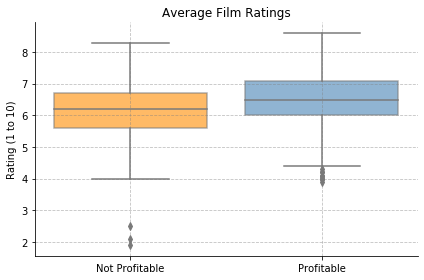

In [41]:
ratings_boxplot=sns.boxplot(x="Profitable",y="Vote Average",data=df_new, palette="coolwarm", order=["Not Profitable","Profitable"], boxprops=dict(alpha=0.6))
# Change the facecolors to be consistent with the other charts
ratings_boxplot.artists[0].set_facecolor("darkorange")
ratings_boxplot.artists[1].set_facecolor("steelblue")

plt.grid(True,color="grey",linestyle="--",alpha=0.5)
sns.despine()
plt.xlabel("")
plt.ylabel("Rating (1 to 10)")
plt.title("Average Film Ratings")
plt.tight_layout()

# Show chart and save
plt.savefig("output_data/film_ratings_boxplot.png")
plt.show()

#### Conclusion
* Most of Movie budget under ten million US Dollars
* Most of Movie Revenu under one hundred million US Dollars
* Most of Movie Review is between 5~8
* The Higher is either of Budget or Revenue, less likely the movie rate is estimated low
* On Average, The profitable movies’ review are higher than non-profitable movies

#### Question 3 What is the relationship between budget and rated

In [42]:
#Outlier for the revenue
df_1['Revenue'].max()

2797800564.0

In [43]:
index_3 = df_2[df_2['Vote Average']==0].index
new = df_2.drop(index_3, inplace = True)
new = df_2.groupby("Rated")

In [44]:
df_2["Rated"].value_counts()

R            2569
Not Rated    1673
PG-13        1215
PG            521
TV-MA         418
TV-14         300
Unrated       203
TV-G          196
TV-PG         165
G             130
NOT RATED      30
TV-Y7          23
TV-Y           19
NC-17           4
TV-Y7-FV        3
M               2
TV-13           1
Approved        1
UNRATED         1
Name: Rated, dtype: int64

In [45]:
new.get_group('G').mean()

Adult           0.000000e+00
Budget          5.592333e+07
Popularity      8.988346e+00
Revenue         1.977814e+08
Run Time        6.544186e+01
Vote Average    6.531538e+00
Vote Count      5.112000e+02
Metascore       6.491667e+01
IMDB Rating     6.386923e+00
dtype: float64

In [46]:
new.get_group('R').mean()

Adult           0.000000e+00
Budget          1.934693e+07
Popularity      9.537257e+00
Revenue         4.705010e+07
Run Time        1.017317e+02
Vote Average    5.967731e+00
Vote Count      7.083149e+02
Metascore       5.493337e+01
IMDB Rating     5.955850e+00
dtype: float64

In [47]:
new.get_group('PG').mean()

Adult           0.000000e+00
Budget          6.444281e+07
Popularity      1.194657e+01
Revenue         2.018292e+08
Run Time        9.687209e+01
Vote Average    6.417274e+00
Vote Count      1.155764e+03
Metascore       5.525067e+01
IMDB Rating     6.223462e+00
dtype: float64

In [48]:
new.get_group('PG-13').mean()

Adult           0.000000e+00
Budget          5.537219e+07
Popularity      1.226417e+01
Revenue         1.713843e+08
Run Time        1.063776e+02
Vote Average    6.334074e+00
Vote Count      1.772145e+03
Metascore       5.233560e+01
IMDB Rating     6.272900e+00
dtype: float64

In [49]:
new.get_group('Not Rated').mean()

Adult           0.000000e+00
Budget          9.270927e+06
Popularity      5.897368e+00
Revenue         2.601622e+07
Run Time        1.014100e+02
Vote Average    6.148536e+00
Vote Count      1.260072e+02
Metascore       5.897106e+01
IMDB Rating     6.080992e+00
dtype: float64

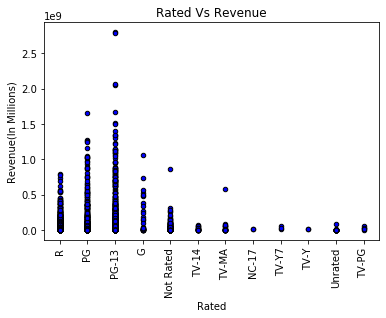

In [50]:
# MPAA rating (Omdb_Rating) Vs Revenue
plt.scatter(df_1["Rated"],df_1["Revenue"], s= 20, edgecolors="black",facecolors="blue")
plt.title("Rated Vs Revenue")
plt.xlabel("Rated")
plt.ylabel("Revenue(In Millions)")
plt.xticks(rotation=90)
plt.savefig('output_data/Rated vs Revenue.png')
plt.show()

#### Conclusion
* PG 13 movie has the highest revenue